In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pylab as py
import os
import statsmodels.api as sm

In [32]:
from pandas import to_datetime
import pandas as pd

In [37]:
def plotPrices(market='', stock='', period='Day', index=False):
    fields=['Date', 'Open', 'Close']
    if index:
        data = read_csv('./'+market.lower()+'data1.csv', 
            usecols=fields, index_col=False)
    else:
        data = read_csv('./content/'+market.upper()+'/'+stock, 
            usecols=fields, index_col=False)

    price = data

    if period == 'Day':
        price = data
    elif period == 'Week':
        data['Day'] = (to_datetime(data['Date'])).dt.day_name()
        price = data.loc[data['Day'] == 'Monday']
    else:
        price = data.groupby(pd.DatetimeIndex(data['Date']).to_period('M')).nth(0)
    X = np.arange(len(price))
    Y = np.array(price['Close'])

    if index:
        plt.title(market.upper()+" Index Data "+stock+" Period="+str(period))
    else:
        plt.title(market.upper()+" Stock Data "+stock+" Period="+str(period))
    plt.xlabel("Time")
    plt.ylabel("Index Value")
    plt.plot(X, Y, label=period)
    plt.legend()

In [43]:
def model(market='BSE', stock='', period='Day', index=False):
    print(period)
    pad = 0
    fields=['Date', 'Open', 'Close']
    if index:
        data = read_csv('./'+market.lower()+'data1.csv', 
            usecols=fields, index_col=False)
    else:
        data = read_csv('./content/'+market.upper()+'/'+stock, 
            usecols=fields, index_col=False)

    price = data
    
    if period == 'Day':
        price = data
    elif period == 'Week':
        data['Day'] = (to_datetime(data['Date'])).dt.day_name()
        price = data.loc[data['Day'] == 'Monday']
    else:
        price = data.groupby(pd.DatetimeIndex(data['Date']).to_period('M')).nth(0)
    
    ret = np.array((price['Close']-price['Open'])/price['Open'])
    bins = 50
    mean_ret = np.mean(ret)
    std_dev_ret = np.std(ret)
    norm_ret = (ret - mean_ret)/std_dev_ret   
    plt.subplot(2, 2, pad+1)
    
    if index:
        plt.title(market.upper()+" Index Data "+stock+" Period="+str(period))
    else:
        plt.title(market.upper()+" Stock Data "+stock+" Period="+str(period))
    plt.xlabel("Normal Return")
    plt.ylabel("Frequency")
    
    plt.hist(norm_ret, bins=bins, color='orange', 
                edgecolor='black', linewidth=0.3, density=True)

    mu, sig = 0, 1
    
    X = np.linspace(min(norm_ret), max(norm_ret), len(norm_ret))
    Y = (1/(2*np.pi*(sig**2))**0.5)*np.exp(-(X-mu)**2/(sig)**2)
    plt.plot(X, Y, color='blue', label = "Standard Normal")
    if period == 'Daily':
        plt.legend()
    log_ret = np.log(1 + ret)
    mean_log_ret = np.mean(log_ret)
    std_dev_log_ret = np.std(log_ret)
    norm_log_ret = (log_ret - mean_log_ret)/std_dev_log_ret
    plt.subplot(2, 2, pad+2)

    if index:
        plt.title(market.upper()+" Index Data "+stock+" Period="+str(period))
    else:
        plt.title(market.upper()+" Stock Data "+stock+" Period="+str(period))
    plt.xlabel("Normalised Log Return")
    plt.ylabel("Frequency")

    plt.hist(norm_log_ret, bins=bins, color='orange',
         edgecolor='black', linewidth=0.3, density=True)

    mu, sig = 0, 1
    
    X = np.linspace(min(norm_log_ret), max(norm_log_ret), len(norm_log_ret))
    Y = (1/(2*np.pi*(sig**2))**0.5)*np.exp(-(X-mu)**2/(sig)**2)
    plt.plot(X, Y, color='blue', label = "Standard Normal")
    if period == 'Day':
        plt.legend()
    if period == 'Day':
        initial_ret = log_ret[:987]
        mu = np.sum(initial_ret)/len(initial_ret)/240
        sig = np.std(initial_ret)

        n = len(log_ret) - 987
        print(n)
        phi = np.random.normal(0, 1, n)
        W = np.zeros(n)
        W[0] = 0
        for i in range(1, n):
            W[i] = W[i-1]+phi[i]

        S = np.zeros(n)
        S[0] = price.iloc[987]['Close']
        for i in range(1, n):
            S[i] = S[0]*np.exp(sig*W[i]+(log_ret[987+i]-0.5*(sig**2))*i/240)

        S = np.reshape(S, (len(S), 1))
        actPrice = np.array(price[fields[1]])
        predPrice = actPrice[:987]
        predPrice = np.reshape(predPrice, (len(predPrice), 1))
        predPrice = np.vstack((predPrice, S))
        Y1 = predPrice
        Y2 = actPrice
        X = np.arange(len(Y1))
        plt.subplot(2, 2, pad+3)
        plt.plot(X, Y1, color='blue', label='Predicted Price')
        plt.plot(X, Y2, color='red', label='Actual Price')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
    plt.subplot(2,2, pad+4)
    plt.boxplot(norm_ret)
    plt.show()
    sm.title()
    sm.qqplot(norm_ret, line ='45')
    py.show()

In [44]:
periodicity = ['Day', 'Week', 'Month']

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2640170649.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()
C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2640170649.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()
C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2640170649.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()
C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2640170649.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()
C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2640170649.py:10: UserWarning: Matplotlib is currently u

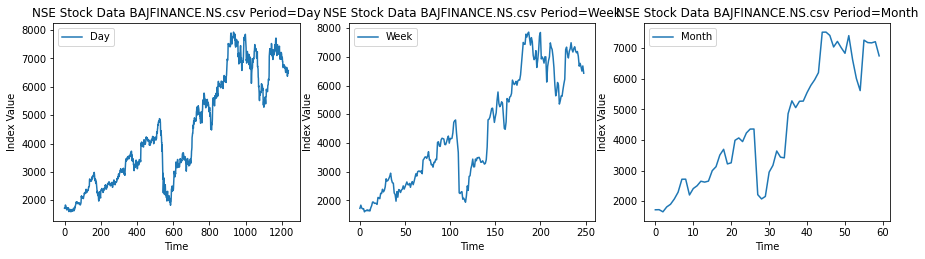

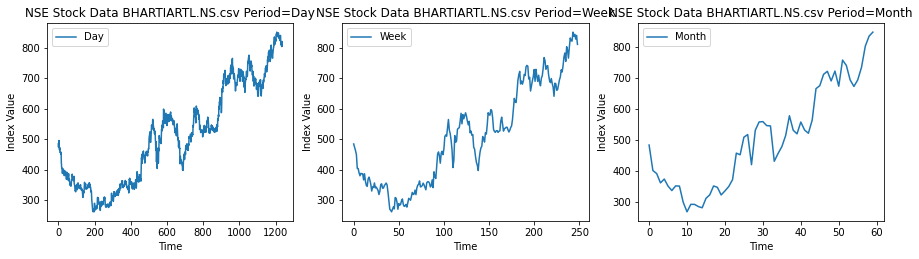

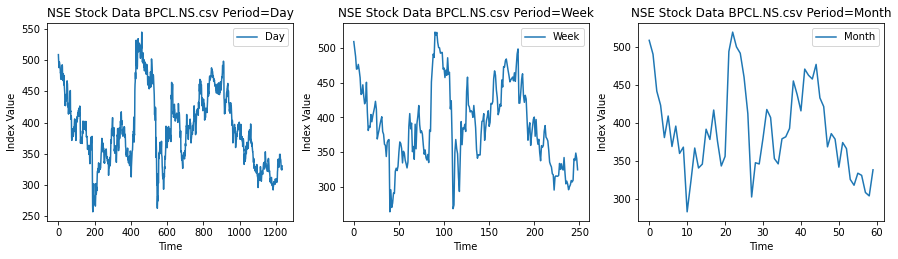

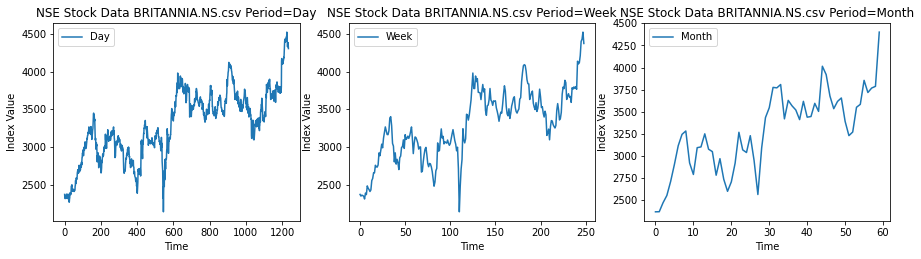

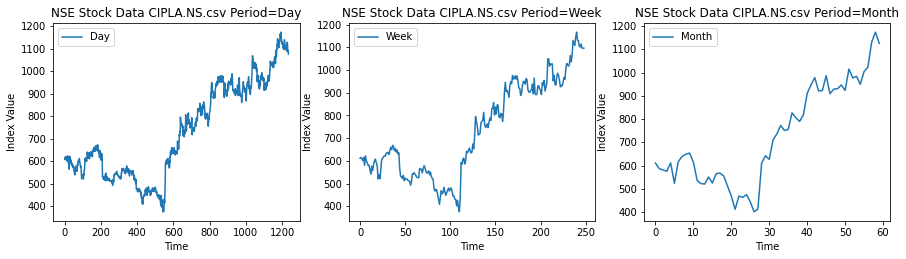

In [45]:
f = 1
for name in os.listdir("./content/NSE"):
    if name == '.ipynb_checkpoints':
      continue
    ax = plt.figure(f, figsize=(15.0, 8.0))
    for i in range(len(periodicity)):
        plt.subplot(2, len(periodicity), i+1)
        plotPrices(market='NSE', stock=name, period=periodicity[i], index=False)
    ax.savefig('./content/Plots/'+name[:-4]+'_1.png')
    ax.show()
    f = f+1

Day
249


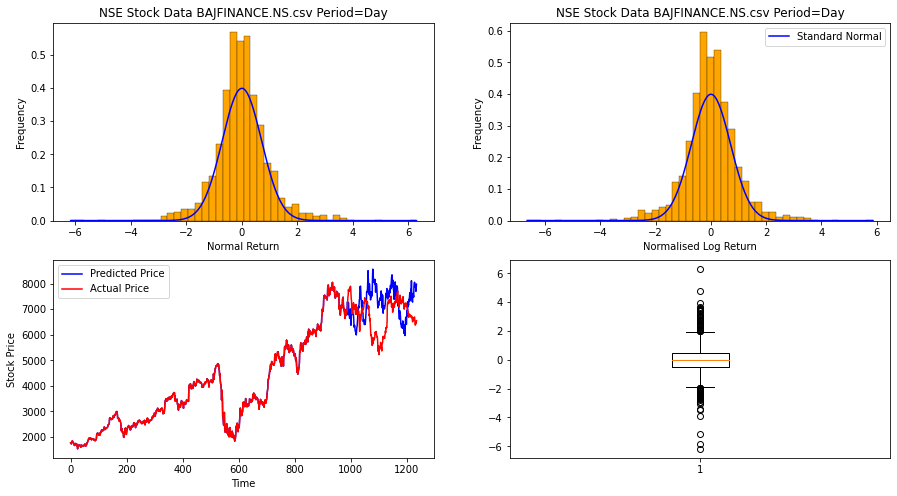

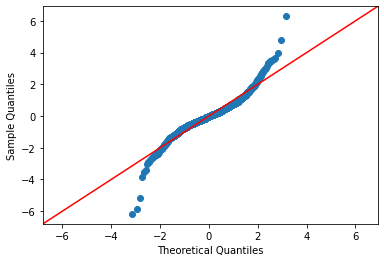

Week


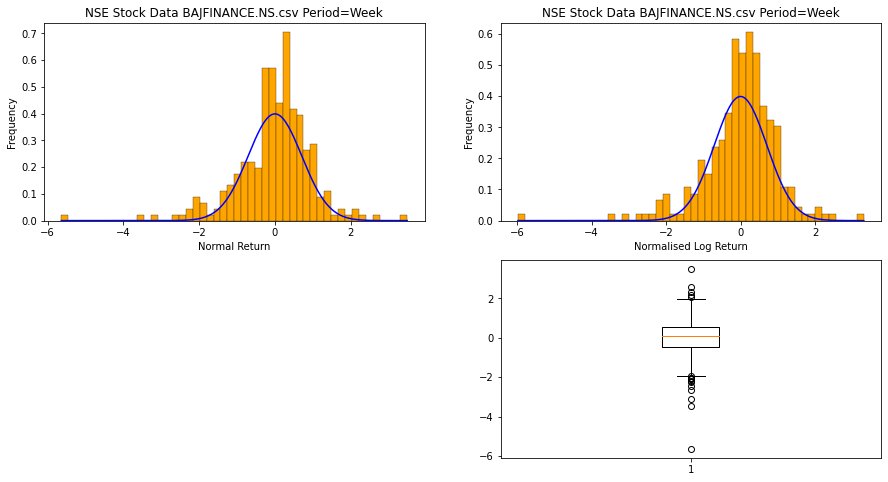

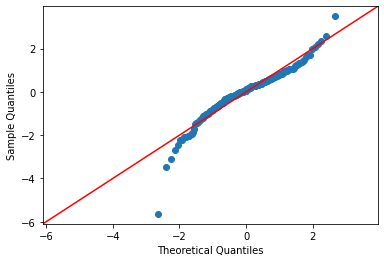

Month


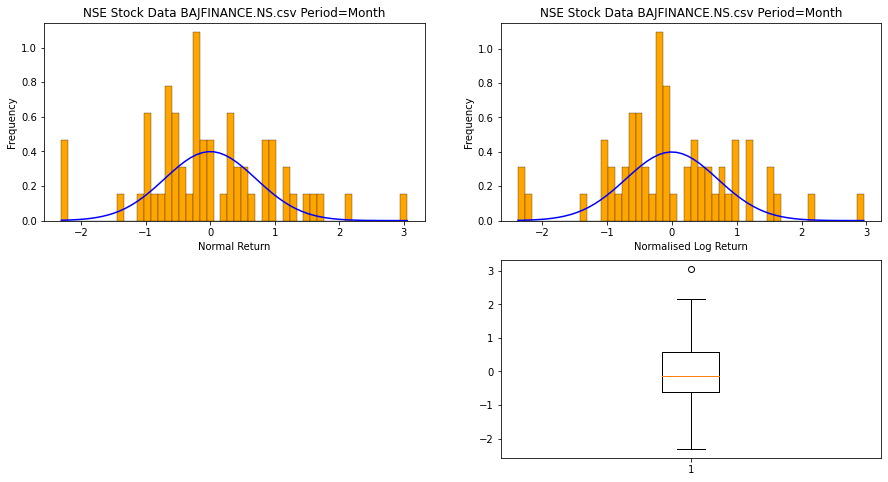

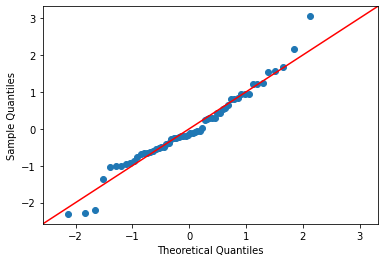

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2514948134.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


Day
249


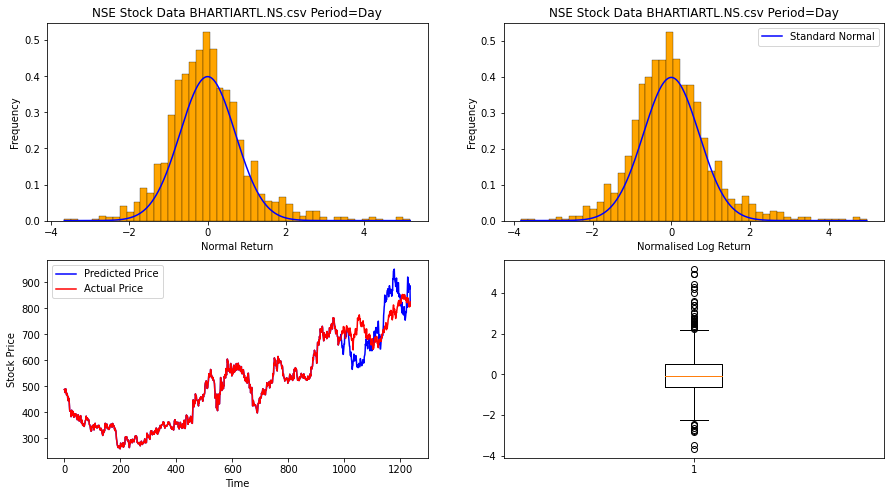

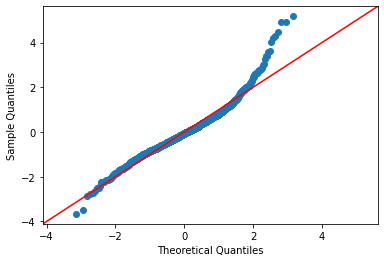

Week


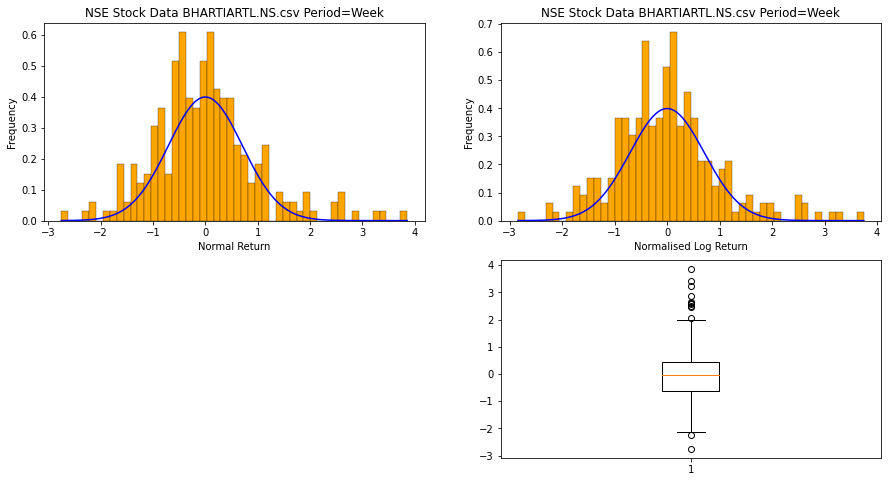

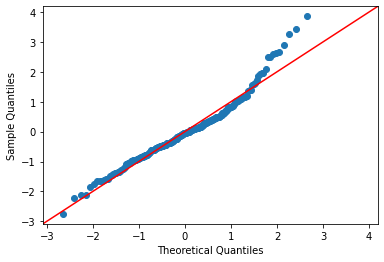

Month


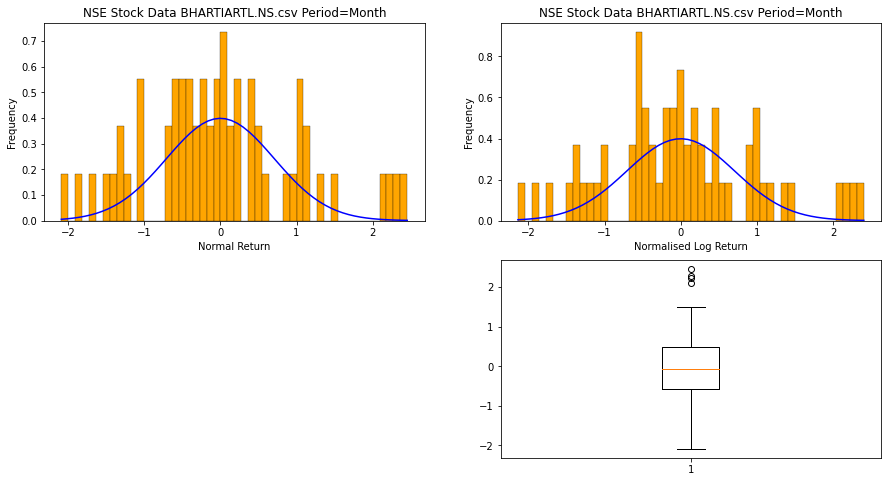

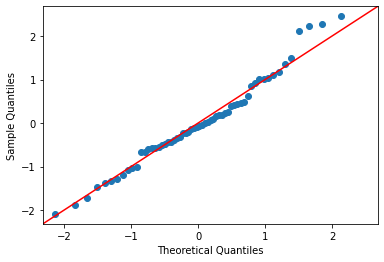

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2514948134.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


Day
249


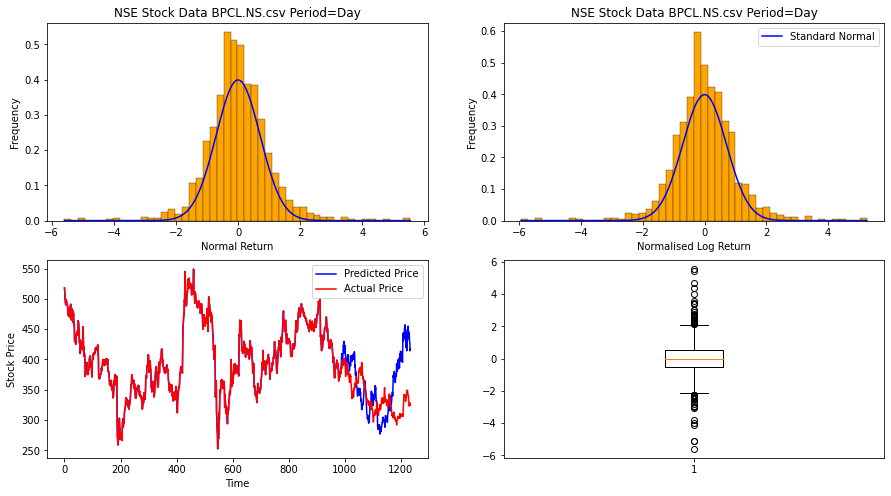

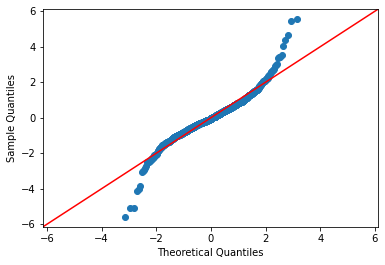

Week


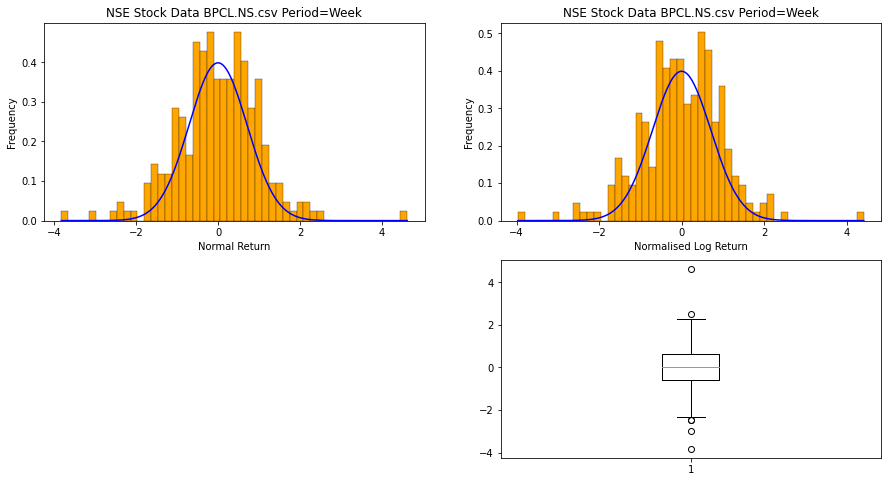

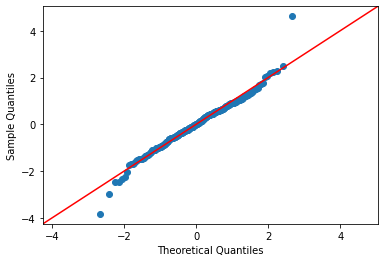

Month


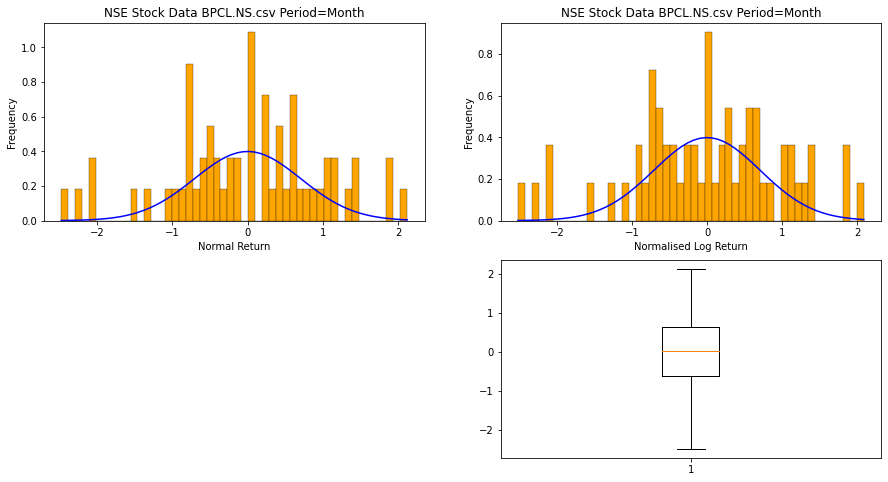

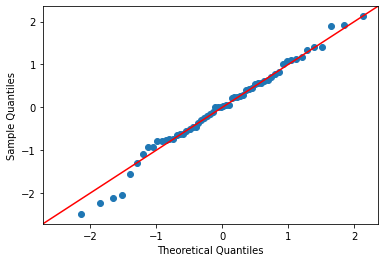

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2514948134.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


Day
249


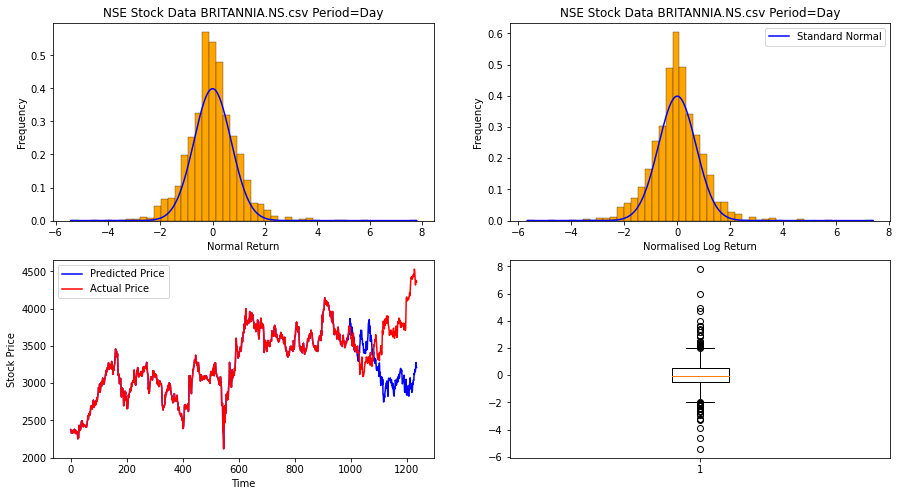

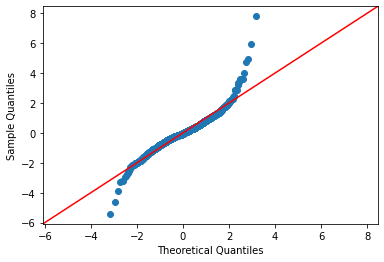

Week


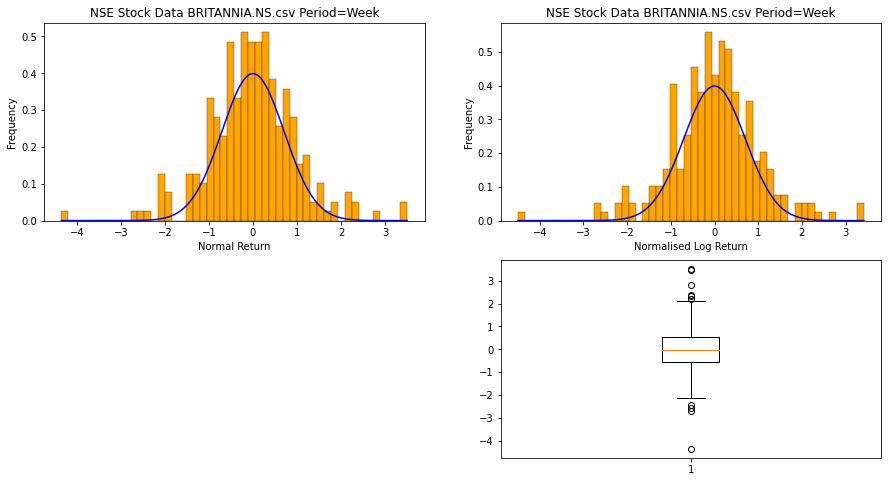

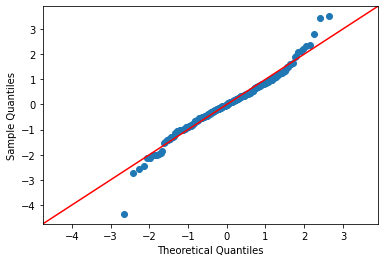

Month


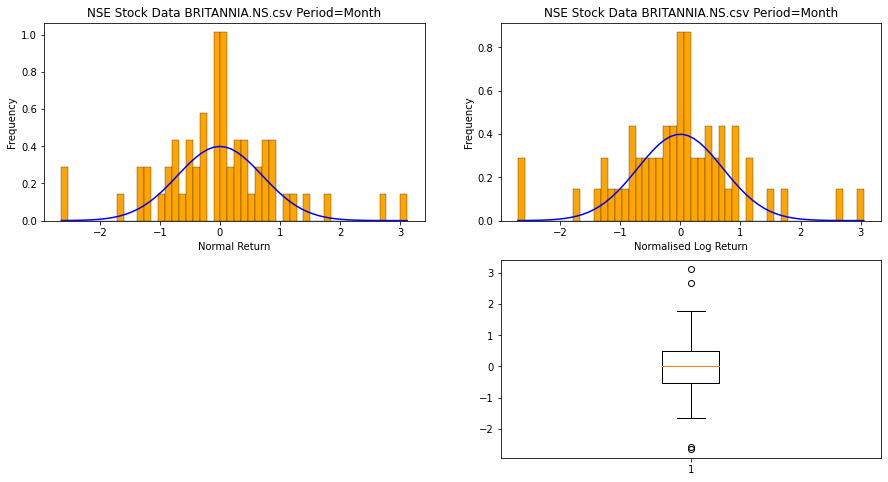

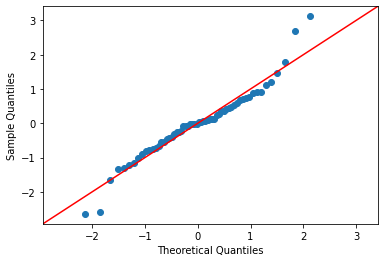

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2514948134.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


Day
249


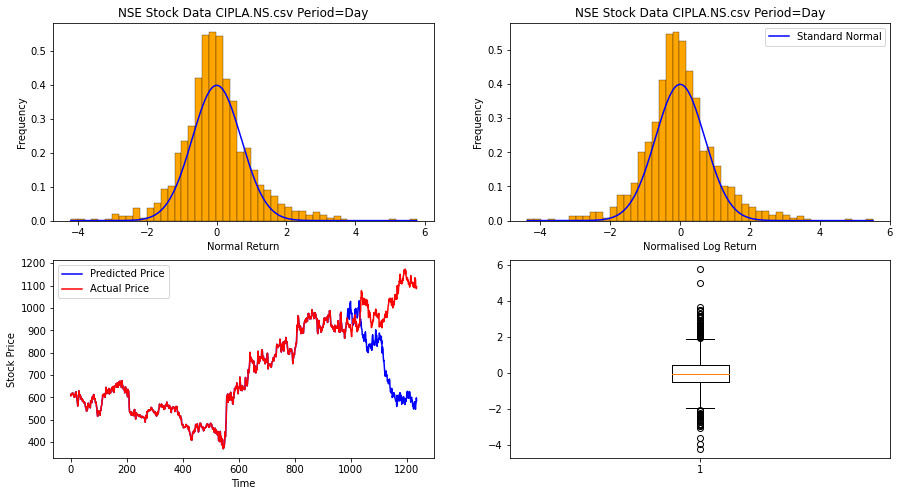

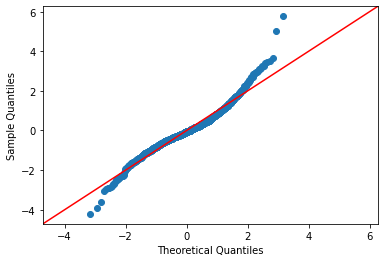

Week


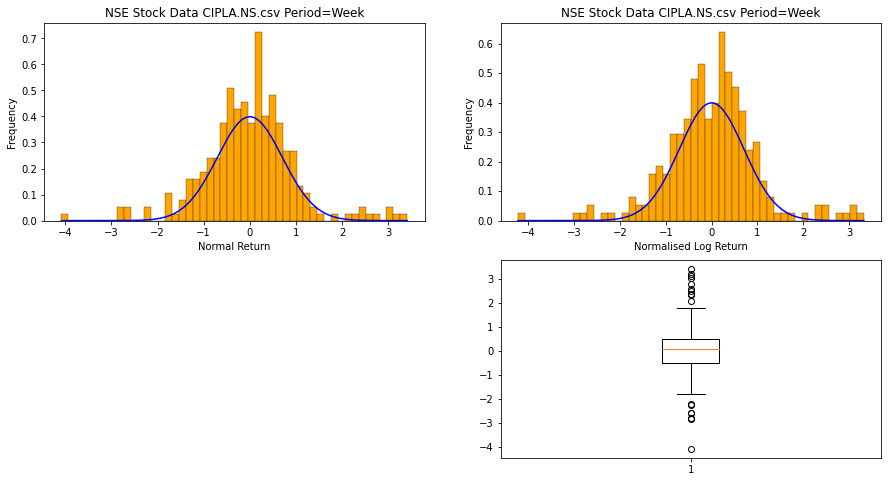

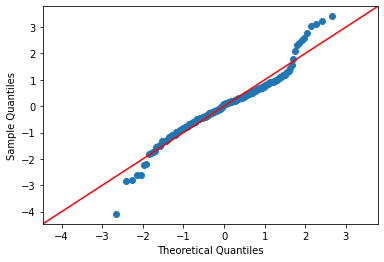

Month


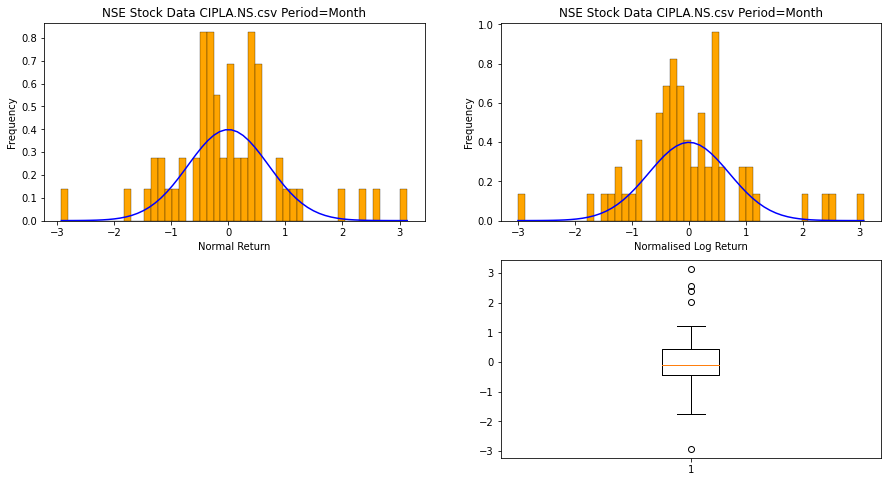

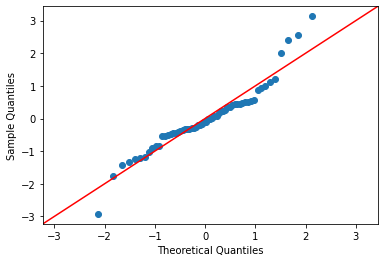

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_15272\2514948134.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


In [47]:
ccf = 1
for name in os.listdir("./content/NSE"):
    if name == '.ipynb_checkpoints':
        continue
    ax = plt.figure(f, figsize=(15.0, 8.0))
    for i in range(len(periodicity)):
        ax = plt.figure(f, figsize=(15.0, 8.0))
        model(market='NSE', stock=name, period=periodicity[i], index=False)
    ax.savefig('./content/Plots/'+name[:-4]+'_2.png')
    ax.show()
    f = f+1